# Przygotowanie środowiska

In [13]:
import os
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import cufflinks as cf

In [14]:
from platform import python_version
python_version()

'3.12.1'

# Przygotowanie danych do analizy

In [15]:
from pandas.core.indexes import base
os.getcwd()

'c:\\Users\\klips\\Documents\\PJATK\\7 - Zimowy\\SUML\\SUML_GR1_TMWT'

In [16]:
base_data = pd.read_csv("data/weatherAUS.csv")

In [17]:
base_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [18]:
print(base_data)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ... 

In [19]:
base_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [20]:
base_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Kolumny z największymi ilościami brakujących danych to Cloud9am (38%), Cloud3pm (41%), Evaporation (43%) oraz Sunshine (48%).

In [21]:
print(base_data.shape[0])

145460


In [22]:
cloud9am_mean = base_data['Cloud9am'].mean()
cloud3pm_mean = base_data['Cloud3pm'].mean()

print("Average Cloud9am:", cloud9am_mean)
print("Average Cloud3pm:", cloud3pm_mean)


Average Cloud9am: 4.4474612602152455
Average Cloud3pm: 4.509930082924903


<Axes: >

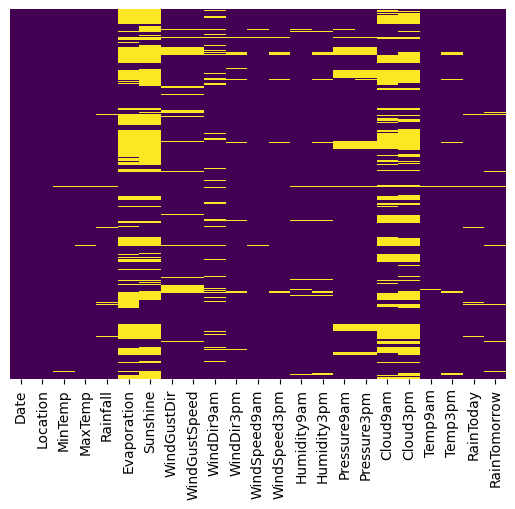

In [23]:
sns.heatmap(base_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [24]:
base_data['Location'].unique()


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [25]:
import pandas as pd

# Słownik zawierający australijskie miasta i ich współrzędne
australian_cities = {
    "Albury": (-36.0736, 146.9135),
    "BadgerysCreek": (-33.8500, 150.7500),
    "Cobar": (-31.5500, 145.8333),
    "CoffsHarbour": (-30.3000, 153.1333),
    "Moree": (-29.4667, 149.8500),
    "Newcastle": (-32.9333, 151.7500),
    "NorahHead": (-33.2833, 151.5667),
    "NorfolkIsland": (-29.0333, 167.9500),
    "Penrith": (-33.7500, 150.7000),
    "Richmond": (-33.6167, 150.7500),
    "Sydney": (-33.8688, 151.2093),
    "SydneyAirport": (-33.9461, 151.1772),
    "WaggaWagga": (-35.1167, 147.4667),
    "Williamtown": (-32.8500, 151.8167),
    "Wollongong": (-34.4250, 150.8833),
    "Canberra": (-35.3075, 149.1244),
    "Tuggeranong": (-35.4235, 149.0754),
    "MountGinini": (-35.5500, 148.7500),
    "Ballarat": (-37.5500, 143.8500),
    "Bendigo": (-36.7667, 144.2667),
    "Sale": (-38.1167, 147.0667),
    "MelbourneAirport": (-37.6667, 144.8333),
    "Melbourne": (-37.8136, 144.9631),
    "Mildura": (-34.2000, 142.1500),
    "Nhil": (-38.2500, 141.6667),
    "Portland": (-38.3500, 141.6167),
    "Watsonia": (-37.7167, 145.0500),
    "Dartmoor": (-37.9167, 141.2500),
    "Brisbane": (-27.4698, 153.0251),
    "Cairns": (-16.9167, 145.7667),
    "GoldCoast": (-28.0167, 153.4000),
    "Townsville": (-19.2500, 146.8000),
    "Adelaide": (-34.9333, 138.5833),
    "MountGambier": (-37.8333, 140.7667),
    "Nuriootpa": (-34.4667, 139.0000),
    "Woomera": (-31.1500, 136.8167),
    "Albany": (-35.0167, 117.850),
    "Witchcliffe": (-33.9500, 115.1833),
    "PearceRAAF": (-31.9167, 115.9500),
    "PerthAirport": (-31.9417, 115.9625),
    "Perth": (-31.9522, 115.8589),
    "SalmonGums": (-33.5667, 123.0833),
    "Walpole": (-34.3667, 116.4167),
    "Hobart": (-42.8806, 147.3256),
    "Launceston": (-41.4593, 147.1472),
    "AliceSprings": (-23.6972, 134.9959),
    "Darwin": (-12.4631, 130.8411),
    "Katherine": (-14.4667, 132.4500),
    "Uluru": (-25.3458, 132.8639)
}

# Stwórz lub wczytaj DataFrame z kolumną "Location" zawierającą tylko podane miasta

# Utwórz nową kolumnę "Coordinates" mapującą miasta na współrzędne z słownika
base_data["Coordinates"] = base_data["Location"].map(australian_cities)

# Wyświetl wynikowy DataFrame
print(base_data)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ... 

<Axes: >

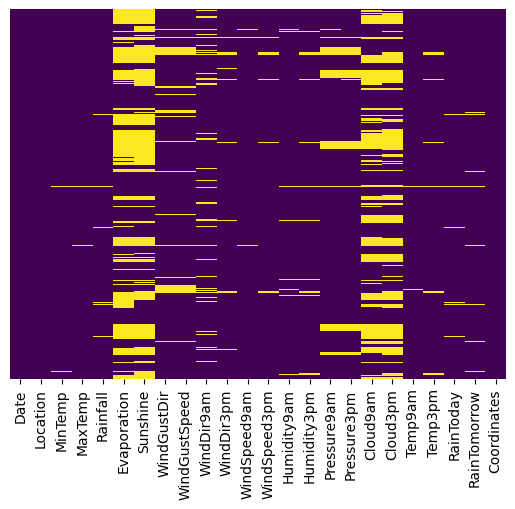

In [26]:
sns.heatmap(base_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [27]:
def clean_data(base_data):
    # Drop column: 'Sunshine'
    base_data = base_data.drop(columns=['Sunshine'])
    # Drop column: 'Evaporation'
    base_data = base_data.drop(columns=['Evaporation'])
    # Drop column: 'Cloud9am'
    base_data = base_data.drop(columns=['Cloud9am'])
    # Drop column: 'Cloud3pm'
    base_data = base_data.drop(columns=['Cloud3pm'])

    # Replace missing values with the median of each column in: 'MinTemp', 'MaxTemp' and 10 other columns
    base_data = base_data.fillna({'MinTemp': base_data['MinTemp'].median(), 'MaxTemp': base_data['MaxTemp'].median(), 'Rainfall': base_data['Rainfall'].ffill(), 'WindGustSpeed': base_data['WindGustSpeed'].median(), 'WindSpeed9am': base_data['WindSpeed9am'].median(), 'WindSpeed3pm': base_data['WindSpeed3pm'].median(
    ), 'Humidity9am': base_data['Humidity9am'].median(), 'Humidity3pm': base_data['Humidity3pm'].median(), 'Pressure9am': base_data['Pressure9am'].median(), 'Pressure3pm': base_data['Pressure3pm'].median(), 'Temp9am': base_data['Temp9am'].median(), 'Temp3pm': base_data['Temp3pm'].median()})
    
    # Replace gaps forward from the previous valid value in: 'RainToday', 'RainTomorrow'
    base_data = base_data.fillna({'RainToday': base_data['RainToday'].ffill(
    ), 'RainTomorrow': base_data['RainTomorrow'].ffill()})
   
    # Replace gaps forward from the previous valid value in: 'WindGustDir', 'WindDir9am', 'WindDir3pm'
    base_data = base_data.fillna({'WindGustDir': base_data['WindGustDir'].ffill(
    ), 'WindDir9am': base_data['WindDir9am'].ffill(), 'WindDir3pm': base_data['WindDir3pm'].ffill()})
    return base_data

base_data_clean = clean_data(base_data.copy())
base_data_clean.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Coordinates
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,"(-36.0736, 146.9135)"
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,"(-36.0736, 146.9135)"
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,"(-36.0736, 146.9135)"
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,"(-36.0736, 146.9135)"
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,"(-36.0736, 146.9135)"


<Axes: >

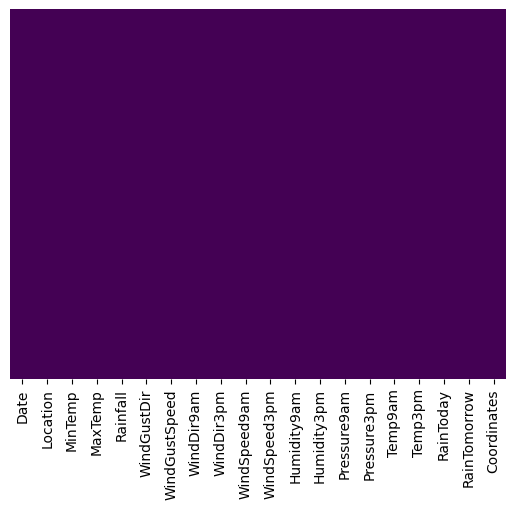

In [28]:
sns.heatmap(base_data_clean.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [30]:
# Przekształć kolumnę 'date' na typ datetime
base_data_clean['Date'] = pd.to_datetime(base_data_clean['Date'])

# Utwórz dataframe dla każdego roku i zapisz go do pliku .csv
for year, data in base_data_clean.groupby(base_data_clean['Date'].dt.year):
    data.to_csv(os.path.join('data', f'data{year}.csv'), index=False)

# Pobranie i przetestowanie próbki z danych

<Axes: >

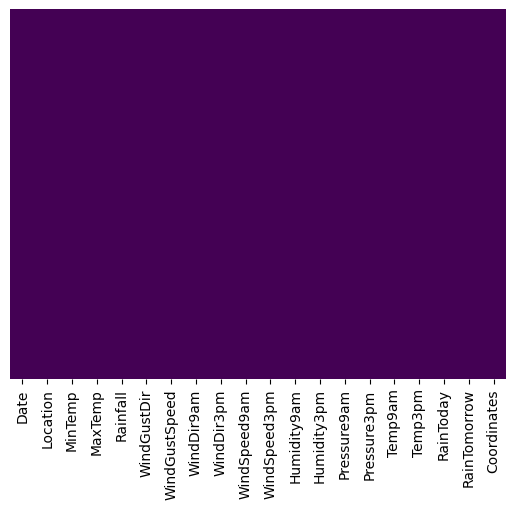

In [32]:
test_data = pd.read_csv('data/data2013.csv')
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')